## 4.3. Veri Temizligi: 3. Asiri Degerler - Odev

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats.mstats import winsorize

In [3]:
# 1
# Öncelikle bir önceki derste uyguladağınız eksik değerleri tamamlama tekniklerinden en uygun olanını uygulayın. 
# Aşağıdaki sorulara cevap verebilmeniz için eksik verilerin üstesinden gelmelisiniz.

# Toplam gelir verilerini içeren TOTAL_REVENUE ve toplam harcama verilerini içeren TOTAL_EXPENDITURE değişkenlerini 
# inceleyin. Bu değişkenler aykırı değerler içeriyor mu?

In [4]:
states = pd.read_csv('states_all.csv')
states.describe()

,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
count,1715.000000,1.224000e+03,1.275000e+03,1.275000e+03,1.275000e+03,1.275000e+03,1.275000e+03,1.275000e+03,1.275000e+03,1.224000e+03,...,1632.000000,1632.000000,1632.000000,1.020000e+03,1.071000e+03,1.632000e+03,565.000000,602.000000,650.000000,562.000000
mean,2002.075219,9.175416e+05,9.102045e+06,7.677799e+05,4.223743e+06,4.110522e+06,9.206242e+06,4.768010e+06,2.682587e+06,4.299509e+05,...,69166.507966,68106.537377,58420.870711,5.779547e+05,2.820691e+05,9.139695e+05,236.327434,278.280731,218.806154,263.558719
std,9.568621,1.066514e+06,1.175962e+07,1.146992e+06,5.549735e+06,5.489562e+06,1.199279e+07,6.300569e+06,3.357214e+06,5.347893e+05,...,79957.990356,77965.847263,67438.530709,6.757837e+05,3.307098e+05,1.055893e+06,9.285505,10.343482,7.681805,6.612601
min,1986.000000,4.386600e+04,4.656500e+05,3.102000e+04,0.000000e+00,2.209300e+04,4.816650e+05,2.655490e+05,1.399630e+05,1.154100e+04,...,4577.000000,3371.000000,2572.000000,3.769800e+04,1.353000e+04,6.844900e+04,192.000000,231.000000,179.000000,236.000000
25%,1994.000000,2.645145e+05,2.189504e+06,1.899575e+05,1.165776e+06,7.151210e+05,2.170404e+06,1.171336e+06,6.380760e+05,1.034492e+05,...,18971.500000,19594.250000,16076.500000,1.649250e+05,8.060800e+04,2.480832e+05,232.000000,272.000000,215.000000,260.000000
50%,2002.000000,6.499335e+05,5.085826e+06,4.035480e+05,2.537754e+06,2.058996e+06,5.242672e+06,2.658253e+06,1.525471e+06,2.717040e+05,...,49087.000000,47880.000000,39408.000000,4.051115e+05,1.869190e+05,6.458050e+05,238.000000,280.500000,220.000000,265.000000
75%,2010.000000,1.010532e+06,1.084516e+07,8.279320e+05,5.055548e+06,4.755293e+06,1.074420e+07,5.561959e+06,3.222924e+06,5.172222e+05,...,78504.250000,78976.000000,69397.250000,6.439752e+05,3.223280e+05,1.043420e+06,242.000000,286.000000,224.000000,268.000000
max,2019.000000,6.307022e+06,8.921726e+07,9.990221e+06,5.090457e+07,3.610526e+07,8.532013e+07,4.396452e+07,2.605802e+07,3.995951e+06,...,493415.000000,500143.000000,498403.000000,3.929869e+06,2.013687e+06,6.441557e+06,253.000000,301.000000,237.000000,280.000000


In [5]:
# her iki degiskende %26 lik eksik degerler bulunuyordu. Bu eksik degerleri ortalamalari ile tamamliyoruz.

states['TOTAL_REVENUE'].fillna(states['TOTAL_REVENUE'].mean(), inplace=True)
states['TOTAL_EXPENDITURE'].fillna(states['TOTAL_EXPENDITURE'].mean(),inplace=True)

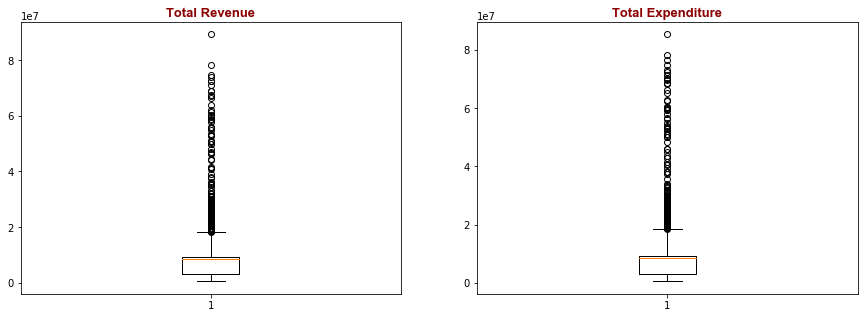

In [7]:
baslik_font = {'family':'arial','color':'darkred','weight':'bold','size':13}
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.boxplot(states['TOTAL_REVENUE'])
plt.title('Total Revenue', fontdict=baslik_font)
plt.subplot(1,2,2)
plt.boxplot(states['TOTAL_EXPENDITURE'])
plt.title('Total Expenditure', fontdict=baslik_font)
plt.show()

# her iki degisken de aykiri degerler iceriyor

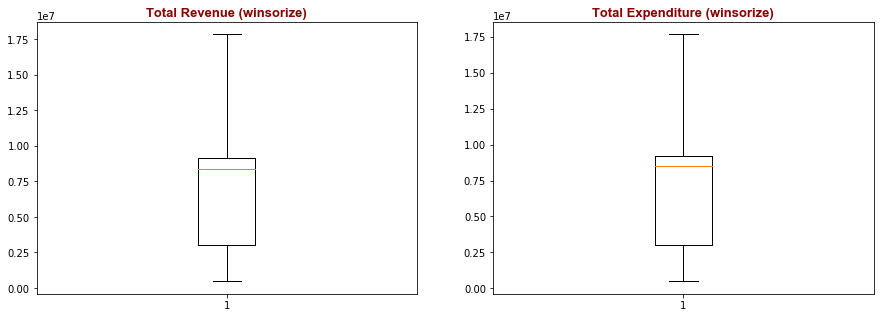

In [8]:
# 2
# Toplam gelir (TOTAL_REVENUE) ve toplam harcama (TOTAL_EXPENDITURE) değişkenlerinde aykırı değer tespit ettiyseniz 
# bu derste öğrendiğiniz teknikleri uygulayarak bu aykırı değerleri ortadan kaldırın ve bunu yaptıktan sonra hiçbir 
# aykırı değer kalmadığını doğrulayın.

from scipy.stats.mstats import winsorize

total_rev_wins = winsorize(states["TOTAL_REVENUE"], (0, 0.10))
total_exp_wins = winsorize(states["TOTAL_EXPENDITURE"], (0, 0.10))

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.boxplot(total_rev_wins)
plt.title('Total Revenue (winsorize)', fontdict=baslik_font)
plt.subplot(1,2,2)
plt.boxplot(total_exp_wins)
plt.title('Total Expenditure (winsorize)', fontdict=baslik_font)
plt.show()

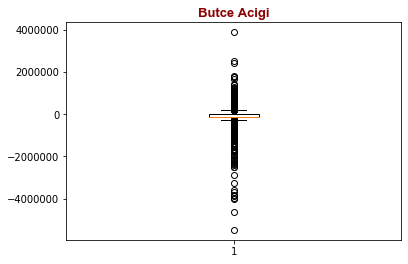

In [9]:
# 3
# Toplam gelir (TOTAL_REVENUE) değişkeninden, toplam harcama (TOTAL_EXPENDITURE) değerini çıkartarak bütçe açığı 
# olarak düşünülebilecek bir değişken oluşturun (aykırı değerleri temezlemeden). Bu yeni değişkende de aykırı 
# değerler yer almakta mı? Varsa bu aykırı değerleri de temizleyin.

states['Butce_Acigi'] = states['TOTAL_REVENUE']-states['TOTAL_EXPENDITURE']
plt.boxplot(states['Butce_Acigi'])
plt.title('Butce Acigi', fontdict = baslik_font)
plt.show()

In [10]:
q75, q25 = np.percentile(states["Butce_Acigi"], [75 ,25])
caa = q75 - q25

In [11]:
esik_degerleri=[]
for esik_degeri in np.arange(1,5,0.5):
    min_deger = q25-(caa*esik_degeri)
    max_deger = q75+(caa*esik_degeri)
    aykiri_deger_sayisi = len((np.where((states["Butce_Acigi"]>max_deger) |
                                       (states["Butce_Acigi"]<min_deger))[0]))
    esik_degerleri.append({'esik_degeri':esik_degeri, 'aykiri_deger_sayisi':aykiri_deger_sayisi})
pd.DataFrame(esik_degerleri)

,aykiri_deger_sayisi,esik_degeri
0,480,1.0
1,362,1.5
2,294,2.0
3,251,2.5
4,222,3.0
5,185,3.5
6,157,4.0
7,131,4.5


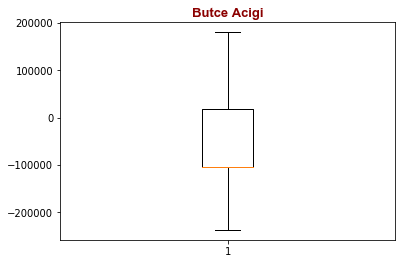

In [12]:
butce_acigi = winsorize(states["Butce_Acigi"], (0.15, 0.10))
plt.boxplot(butce_acigi)
plt.title('Butce Acigi', fontdict = baslik_font)
plt.show()

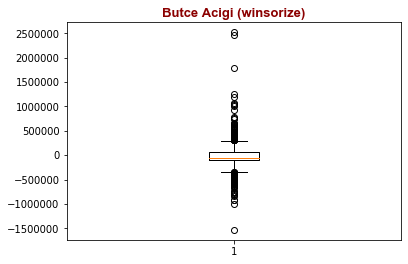

In [13]:
# 4
# Yine toplam gelir (TOTAL_REVENUE) değişkeninden, toplam harcama(TOTAL_EXPENDITURE) değerini çıkartarak bütçe açığı 
# olarak düşünülebilecek bir değişken oluşturun. Fakat bu sefer aykırı değerleri temezledikten sonra bu işlemi yapın. 
# Bu yeni değişkende de aykırı değerler var mı? Varsa bunları da temizlemekte fayda var.

states['Butce_Acigi_wins'] = (winsorize(states['TOTAL_REVENUE'],(0,0.10)))-(winsorize(states['TOTAL_EXPENDITURE'],(0,0.10)))
plt.boxplot(states['Butce_Acigi_wins'])
plt.title('Butce Acigi (winsorize)', fontdict = baslik_font)
plt.show()

In [14]:
q75, q25 = np.percentile(states["Butce_Acigi_wins"], [75 ,25])
caa = q75 - q25

In [15]:
esik_degerleri=[]
for esik_degeri in np.arange(1,5,0.5):
    min_deger = q25-(caa*esik_degeri)
    max_deger = q75+(caa*esik_degeri)
    aykiri_deger_sayisi = len((np.where((states["Butce_Acigi_wins"]>max_deger) |
                                       (states["Butce_Acigi_wins"]<min_deger))[0]))
    esik_degerleri.append({'esik_degeri':esik_degeri, 'aykiri_deger_sayisi':aykiri_deger_sayisi})
pd.DataFrame(esik_degerleri)

,aykiri_deger_sayisi,esik_degeri
0,226,1.0
1,155,1.5
2,106,2.0
3,71,2.5
4,46,3.0
5,30,3.5
6,23,4.0
7,14,4.5


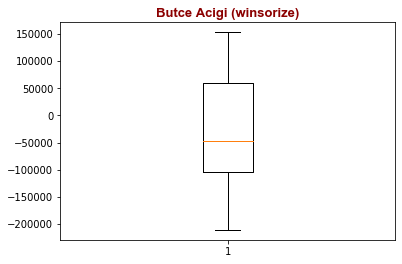

In [16]:
butce_acigi_wins = winsorize(states["Butce_Acigi_wins"], (0.10, 0.10))
plt.boxplot(butce_acigi_wins)
plt.title('Butce Acigi (winsorize)', fontdict = baslik_font)
plt.show()

In [17]:
# 5
# Şimdi elimizde üçüncü ve ve dördüncü sorularda oluşturduğumuz iki farklı bütçe değişkeni var. 
# Bu ikisi arasında fark görüyor musunuz?

# Her iki yontemle yaptigimizda butce aciginda aykiri degerler olustu. Ancak ilk yontemdeki aykiri degerlerin araligi 
# (gorsel olarak baktigimizda) ikinci yonteme gore cok daha yuksek cikti. Tukey yontemi ile aykiri deger sayilarina
# baktigimizda da ilk yontemde daha fazla aykiri deger oldugunu goruyoruz.

In [18]:
# 6
# Bizim için bütçe açığı çok önemli bir değişken olsaydı aykırı değerleri temizlemek için hangi yöntem daha iyi olurdu.
# Üçüncü soruda uguladığınız yöntem mi yoksa dördüncü sorudaki yöntem mi?

# Ikinci yontemde aykiri deger sayisi azaldigi icin ikinci yontem daha tercih edilir diye dusunuyorum.